<a href="https://colab.research.google.com/github/idanjfhgkwl/Project/blob/main/data/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-2. Python visualisation seaborn

In [ ]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
import seaborn as sns
from tabulate import tabulate

sns.set()
tips = sns.load_dataset("tips")
# print(tabulate(tips.head(), tablefmt="pipe", headers="keys")) # Hugo 블로그 전용

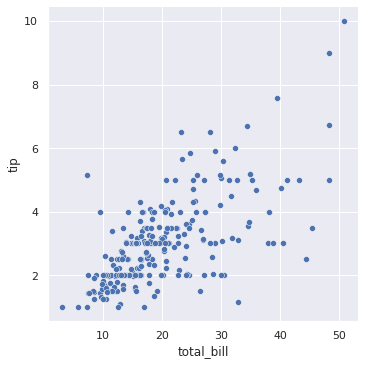

In [ ]:
sns.relplot(x = "total_bill", y = "tip", data = tips)

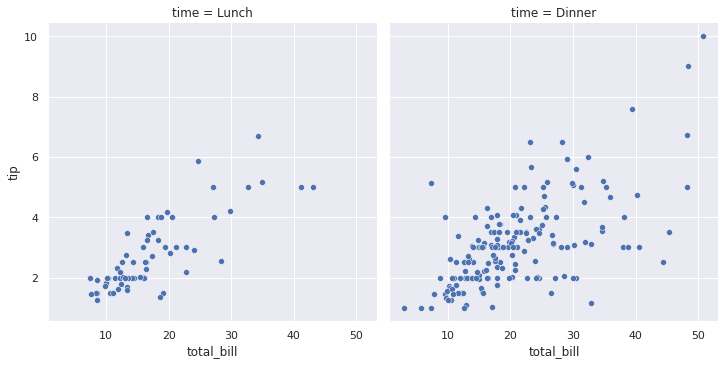

In [ ]:
sns.relplot(x = "total_bill", y = "tip", data = tips, col = "time") # facet_grid

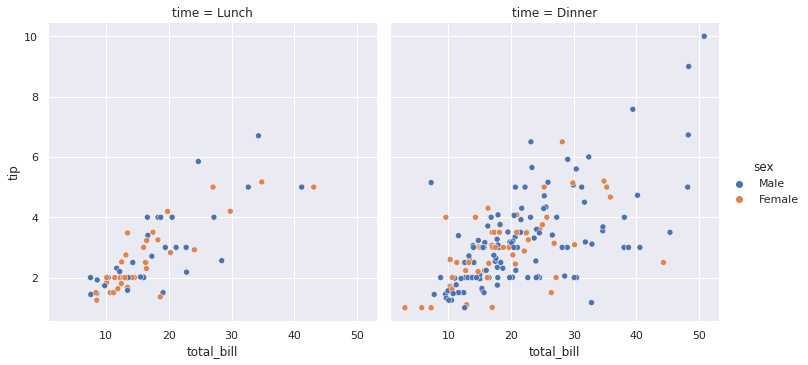

In [ ]:
sns.relplot(x = "total_bill", y = "tip", data = tips, col = "time", hue = "sex")

# Grouped barplots

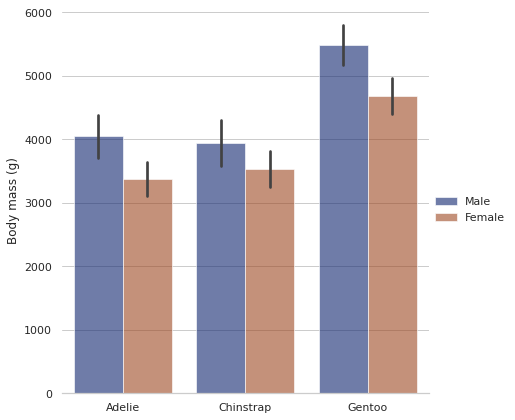

In [ ]:
import seaborn as sns
sns.set_theme(style = "whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex (종별/성별로 중첩 막대 그리기)
g = sns.catplot(
    data = penguins, kind = "bar",
    x = "species", y = "body_mass_g", hue = "sex",
    ci = "sd", palette = "dark", alpha = .6, height = 6
)
g.despine(left = True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# 2. barchart

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
from os.path import join

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/Kaggle_Edu/01_basics/Step1_Visualisation/source/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/Kaggle_Edu/01_basics/Step1_Visualisation/source/data


경로 바꿔주기

In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Kaggle_Edu/01_basics/Step1_Visualisation/source/data


In [ ]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

# Excel 데이터 데이터프레임으로 변환
covid_19 = pd.read_excel("20200406-COVID-19-geographic-disbtribution-worldwide.xlsx")
print(covid_19.head())

     dateRep  day  month  ...  geoId  countryterritoryCode  popData2018
0 2020-04-05    5      4  ...     AF                   AFG   37172386.0
1 2020-04-04    4      4  ...     AF                   AFG   37172386.0
2 2020-04-03    3      4  ...     AF                   AFG   37172386.0
3 2020-04-02    2      4  ...     AF                   AFG   37172386.0
4 2020-04-01    1      4  ...     AF                   AFG   37172386.0

[5 rows x 10 columns]


# Pandas 10분 완성

## 1. Object Creation (객체 생성)

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.228159,1.234685,-0.879434,0.603272
2013-01-02,-0.261405,-2.182294,-0.649895,-0.948859
2013-01-03,0.616349,-0.013339,-0.379738,0.232565
2013-01-04,-0.386493,1.252912,-0.184201,1.849381
2013-01-05,1.659037,0.500696,0.829372,0.542281
2013-01-06,0.776246,-1.495346,1.373175,-0.746988


In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2. Viewing Data (데이터 확인하기)

In [ ]:
df.head()

,A,B,C,D
2013-01-01,0.228159,1.234685,-0.879434,0.603272
2013-01-02,-0.261405,-2.182294,-0.649895,-0.948859
2013-01-03,0.616349,-0.013339,-0.379738,0.232565
2013-01-04,-0.386493,1.252912,-0.184201,1.849381
2013-01-05,1.659037,0.500696,0.829372,0.542281


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.386493,1.252912,-0.184201,1.849381
2013-01-05,1.659037,0.500696,0.829372,0.542281
2013-01-06,0.776246,-1.495346,1.373175,-0.746988


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[ 0.22815921,  1.23468522, -0.87943362,  0.6032723 ],
       [-0.26140514, -2.18229404, -0.64989502, -0.94885876],
       [ 0.6163486 , -0.01333909, -0.37973774,  0.23256484],
       [-0.386493  ,  1.25291176, -0.1842009 ,  1.84938107],
       [ 1.65903684,  0.50069641,  0.82937161,  0.54228133],
       [ 0.77624612, -1.49534631,  1.37317469, -0.74698806]])

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.438649,-0.117114,0.018213,0.255275
std,0.755002,1.432570,0.888299,1.019768
min,-0.386493,-2.182294,-0.879434,-0.948859
25%,-0.139014,-1.124845,-0.582356,-0.502100
50%,0.422254,0.243679,-0.281969,0.387423
75%,0.736272,1.051188,0.575978,0.588025
max,1.659037,1.252912,1.373175,1.849381


In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.228159,-0.261405,0.616349,-0.386493,1.659037,0.776246
B,1.234685,-2.182294,-0.013339,1.252912,0.500696,-1.495346
C,-0.879434,-0.649895,-0.379738,-0.184201,0.829372,1.373175
D,0.603272,-0.948859,0.232565,1.849381,0.542281,-0.746988


In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.603272,-0.879434,1.234685,0.228159
2013-01-02,-0.948859,-0.649895,-2.182294,-0.261405
2013-01-03,0.232565,-0.379738,-0.013339,0.616349
2013-01-04,1.849381,-0.184201,1.252912,-0.386493
2013-01-05,0.542281,0.829372,0.500696,1.659037
2013-01-06,-0.746988,1.373175,-1.495346,0.776246


In [ ]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.261405,-2.182294,-0.649895,-0.948859
2013-01-06,0.776246,-1.495346,1.373175,-0.746988
2013-01-03,0.616349,-0.013339,-0.379738,0.232565
2013-01-05,1.659037,0.500696,0.829372,0.542281
2013-01-01,0.228159,1.234685,-0.879434,0.603272
2013-01-04,-0.386493,1.252912,-0.184201,1.849381


## 3. Selection (선택)

In [ ]:
df['A']

2013-01-01    0.228159
2013-01-02   -0.261405
2013-01-03    0.616349
2013-01-04   -0.386493
2013-01-05    1.659037
2013-01-06    0.776246
Freq: D, Name: A, dtype: float64

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,0.228159,1.234685,-0.879434,0.603272
2013-01-02,-0.261405,-2.182294,-0.649895,-0.948859
2013-01-03,0.616349,-0.013339,-0.379738,0.232565


In [ ]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.261405,-2.182294,-0.649895,-0.948859
2013-01-03,0.616349,-0.013339,-0.379738,0.232565
2013-01-04,-0.386493,1.252912,-0.184201,1.849381


In [ ]:
df.loc[dates[0]]

A    0.228159
B    1.234685
C   -0.879434
D    0.603272
Name: 2013-01-01 00:00:00, dtype: float64

# 1-3 Python Pandas intro

In [ ]:
import pandas as pd
print(pd.__version__)

1.1.3


In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
temp_series = pd.Series([1,2,3,5,8,13,21])
print(temp_series)

0     1
1     2
2     3
3     5
4     8
5    13
6    21
dtype: int64


In [ ]:
series_df = pd.DataFrame({
    "No":range(1,5), 
    "날짜":pd.Timestamp('20200601'), 
    "출석점수":pd.Series(5, index=list(range(4)), dtype='float64'), 
    "등급":pd.Categorical(["A등급", "B등급", "C등급", "D등급"]), 
    "구분":"학점"
})

display(series_df)

,No,날짜,출석점수,등급,구분
0,1,2020-06-01,5.0,A등급,학점
1,2,2020-06-01,5.0,B등급,학점
2,3,2020-06-01,5.0,C등급,학점
3,4,2020-06-01,5.0,D등급,학점


In [ ]:
dict_df = [{'가': '사과', '나': '볼'},{'가': '비행기', '나': '방망이', '다': '고양이'}]
dict_df = pd.DataFrame(dict_df)
display(dict_df)

,가,나,다
0,사과,볼,NaN
1,비행기,방망이,고양이


In [ ]:
sdf = {
    '국가':['한국', '미국', '일본'],
    'ISO-Code':[1,2,3],
    '지역': [4180.69, 4917.94, 454.07,],
    '위치': ["서울", "LA", "동경"]
    }
sdf = pd.DataFrame(sdf)
display(sdf)

,국가,ISO-Code,지역,위치
0,한국,1,4180.69,서울
1,미국,2,4917.94,LA
2,일본,3,454.07,동경


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url)
display(df.head(2))

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
           'marital_status', 'occupation', 'relationship', 'ethnicity', 
           'gender','capital_gain','capital_loss','hours_per_week','country_of_origin','income']

df2 = pd.read_csv(url, names=columns)
display(df2.head(2))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   marital_status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   ethnicity          32561 non-null  object
 9   gender             32561 non-null  object
 10  capital_gain       32561 non-null  int64 
 11  capital_loss       32561 non-null  int64 
 12  hours_per_week     32561 non-null  int64 
 13  country_of_origin  32561 non-null  object
 14  income             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
